##  Open Machine Learning Course-Topic 02.Visual Data Analysis with Python

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [2]:
filename = r'.\data\telecom_churn.csv'
telecom_df = pd.read_csv(filename)
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Notes
##### Knowledge about the response can be gained by creating a histogram or box plot.This simple visualization will reveal the amount of variation in the response and if the response was generated by a process that has unusual characteristics that must be investigated further. Next, we can move on to exploring relationships among the predictors and between predictors and the response. Important characteristics can be identified by examining

- scatter plots of individual predictors and the response,
- a pairwise correlation plot among the predictors,
- a projection of high dimensional predictors into a lower dimensional space,
- line plots for time-based predictors,
- the first few levels of a regression or classification tree,
- a heat map across the samples and predictors, or
- mosaic plots for examining associations among categorical variables.

######  In fact, a simple scatter plot can elicit insights that a model may not be able to uncover, and can lead to the creation of a new predictor or to a transformation of a predictor or the response that improves model performance.The challenge here lies in developing intuition for knowing how to visually explore data to extract information for improvement.

### Univariate visualization
#### Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

##### Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

###### 2.1 Quantitative features
###### Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

###### Histograms and density plots
###### A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

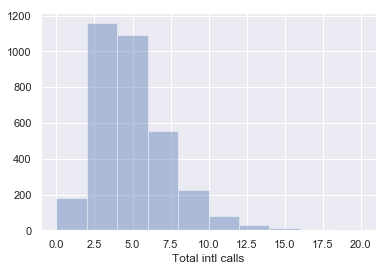

In [3]:
ax = sns.distplot(telecom_df['Total intl calls'],kde=False,bins =10)

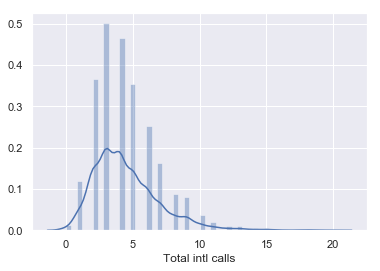

In [4]:
sns.distplot(telecom_df['Total intl calls'],norm_hist=True)
plt.show()

#### Box plot
##### Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th (Q1) and 75th (Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

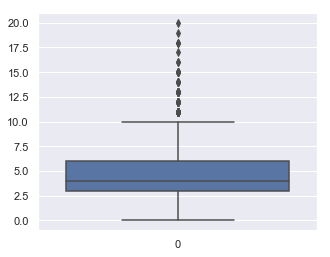

In [5]:
_,ax =plt.subplots(figsize=(5,4))
sns.boxplot(data=telecom_df['Total intl calls'], ax=ax)
plt.show()

#### The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR, Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.
#### Outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

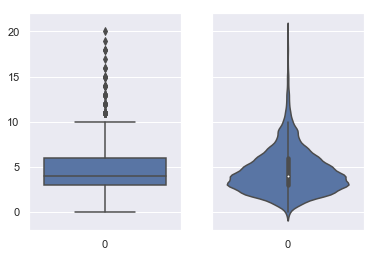

In [6]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data =telecom_df['Total intl calls'],ax =axes[0])
sns.violinplot(data =telecom_df['Total intl calls'],ax =axes[1])
plt.show()

#### Categorical plots
*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example.

*Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn's function countplot().

There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

In [7]:
#telecom_df['Customer service calls-log'] =np.log1p(telecom_df['Customer service calls'])
#telecom_df.head()

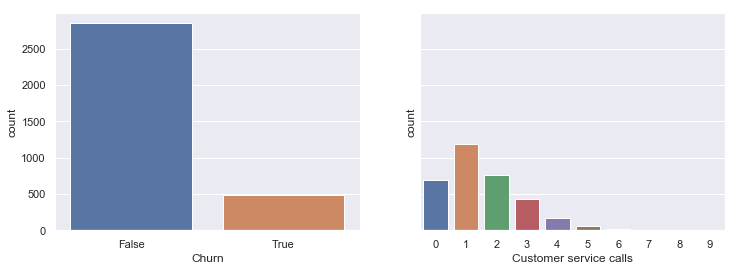

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.countplot(x='Churn' ,data = telecom_df,ax =axes[0])
sns.countplot(x ='Customer service calls' ,data =telecom_df, ax= axes[1])
plt.show()

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

<li> Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.</li>

<li>The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.</li>

<li>The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Customer service calls in our data), the bars are usually ordered by variable value.
</li>


The left chart above vividly illustrates the imbalance in our target variable. The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

#### Multivariate visualization
###### Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 3.1 Quantitative vs. Quantitative
##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:



In [9]:
telecom_num_df =  telecom_df.select_dtypes(exclude = ['object','bool'])

In [10]:
telecom_num_df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


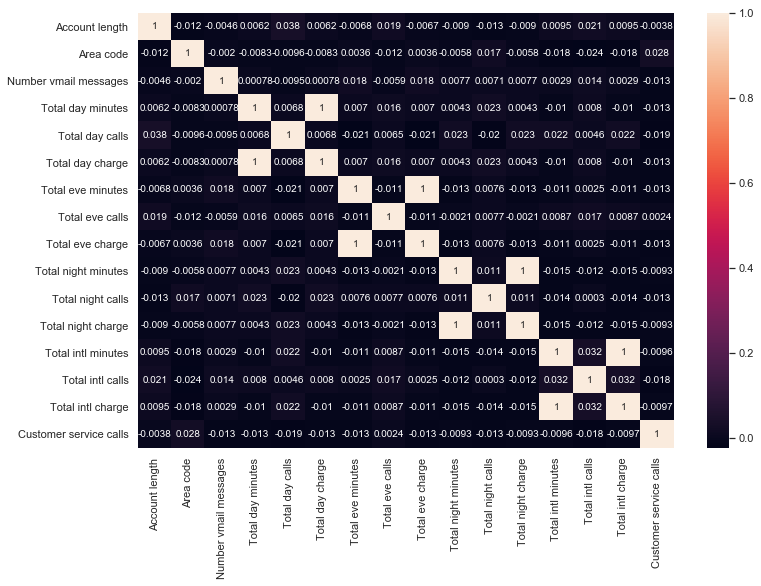

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = telecom_num_df.corr()
sns.heatmap(corr_matrix,annot=True);

In [12]:
corr_matrix =telecom_num_df.corr('pearson')
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) 
correlation_threshold = 0.80
to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]
to_drop    

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [13]:
correlated_predictors ={}
record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])
for column in to_drop:
    co_related_features = list(upper.index[upper[column].abs() > correlation_threshold])
    co_related_values = list(upper[column][upper[column].abs() > correlation_threshold])
    drop_features = [column for _ in range(len(co_related_features))]  

    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': co_related_features,
                                             'corr_value': co_related_values})
    record_collinear = record_collinear.append(temp_df, ignore_index = True)
record_collinear.sort_values(by=['corr_value'],ascending=True)

,drop_feature,corr_feature,corr_value
3,Total intl charge,Total intl minutes,0.999993
2,Total night charge,Total night minutes,0.999999
1,Total eve charge,Total eve minutes,1.000000
0,Total day charge,Total day minutes,1.000000


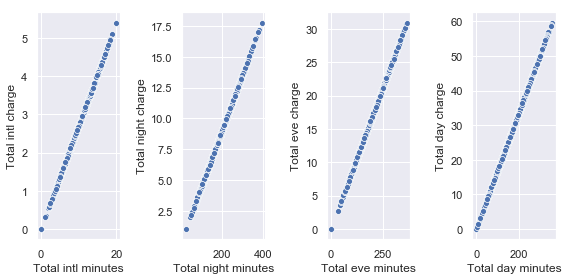

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(8, 4))
sns.scatterplot(x="Total intl minutes", y="Total intl charge", data=telecom_num_df,ax =axes[0])
sns.scatterplot(x="Total night minutes", y="Total night charge", data=telecom_num_df,ax =axes[1])
sns.scatterplot(x="Total eve minutes", y="Total eve charge", data=telecom_num_df,ax =axes[2])
sns.scatterplot(x="Total day minutes", y="Total day charge", data=telecom_num_df,ax =axes[3])
fig.tight_layout()
plt.show()

In [15]:
#sns.pairplot(telecom_num_df)

#### Quantitative vs. Categorical

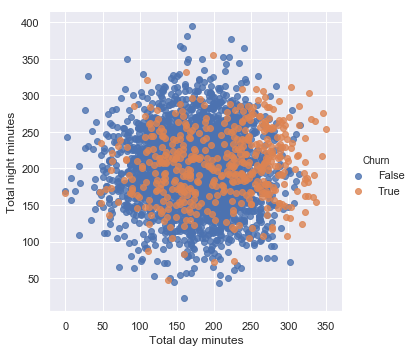

In [16]:
sns.lmplot('Total day minutes', 'Total night minutes', data=telecom_df, hue='Churn', fit_reg=False);

#### When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called catplot()

<Figure size 288x432 with 0 Axes>

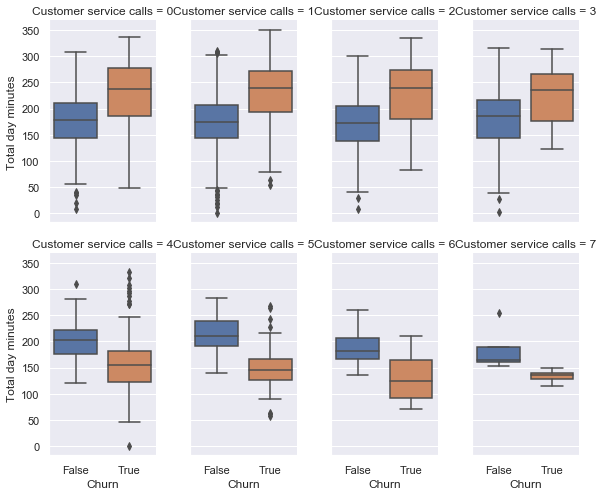

In [17]:
plt.figure(figsize=(4, 6))
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=telecom_df[telecom_df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3.5, aspect=.6)


#### Categorical vs. Categorical

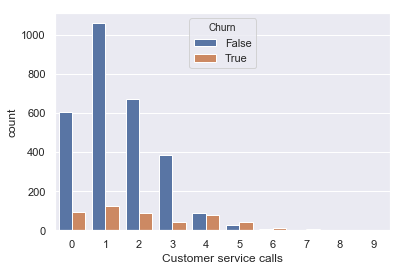

In [18]:
sns.countplot(x='Customer service calls', hue='Churn',data = telecom_df)

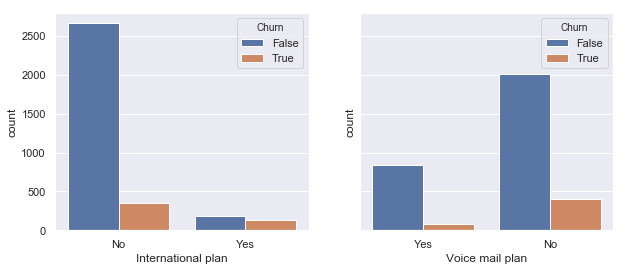

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=telecom_df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=telecom_df, ax=axes[1]);

Contingency table
In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a cross tabulation. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how Churn is related to the categorical variable State by creating a cross tabulation:

In [20]:
pd.crosstab(telecom_df['State'], telecom_df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


#### 4.2 Dimensionality reduction
Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.




##### 4.3 t-SNE
Let’s create a t-SNE representation of the same churn data we have been using.

The name of the method looks complex and a bit intimidating: t-distributed Stohastic Neighbor Embedding. Its math is also impressive (we will not delve into it here, but, if you feel brave, here is the original article by Laurens van der Maaten and Geoffrey Hinton from JMLR). Its basic idea is simple: find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.

Essentially, neighbor embedding is a search for a new and less-dimensional data representation that preserves neighborship of examples.

Now, let's do some practice. First, we need to import some additional classes:

In [22]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
features_df = telecom_df.drop(['Churn','State'],axis =1)
features_df['International plan'] = features_df['International plan'].map({'Yes':1,'No':0})
features_df['Voice mail plan'] =features_df['Voice mail plan'].map({'Yes':1,'No':0})

In [23]:
scaler = StandardScaler()
features_scaled_df = scaler.fit_transform(features_df)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(features_scaled_df)

Wall time: 1min 9s


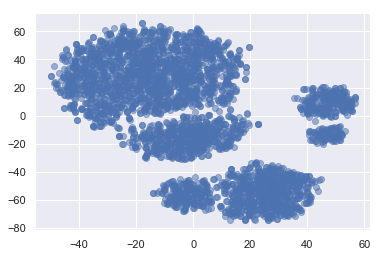

In [25]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

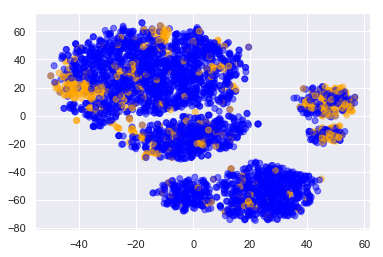

In [26]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=telecom_df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

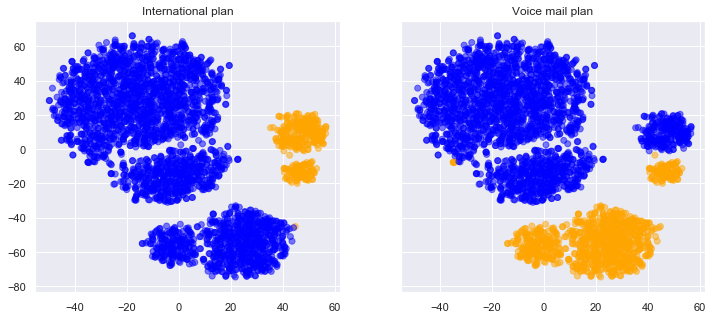

In [28]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=telecom_df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);